In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 8
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05, focal loss gamma 8, weight decay 0.1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.4179	Val Loss:	1.7541	Accuracy:	0.3964	F1:	0.3614
2 / 30: Train Loss:	2.6922	Val Loss:	1.5240	Accuracy:	0.4675	F1:	0.4635
3 / 30: Train Loss:	0.9858	Val Loss:	1.2259	Accuracy:	0.6627	F1:	0.6421
4 / 30: Train Loss:	0.3096	Val Loss:	1.1839	Accuracy:	0.6420	F1:	0.6270
5 / 30: Train Loss:	0.1593	Val Loss:	1.1167	Accuracy:	0.6598	F1:	0.6277
6 / 30: Train Loss:	0.0625	Val Loss:	1.0563	Accuracy:	0.6923	F1:	0.6566
7 / 30: Train Loss:	0.0414	Val Loss:	1.0289	Accuracy:	0.7130	F1:	0.6713
8 / 30: Train Loss:	0.0251	Val Loss:	1.0245	Accuracy:	0.6953	F1:	0.6500
9 / 30: Train Loss:	0.0265	Val Loss:	1.0390	Accuracy:	0.6834	F1:	0.6399
10 / 30: Train Loss:	0.0135	Val Loss:	0.9825	Accuracy:	0.7130	F1:	0.6702
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.67      0.66      0.66        67
               anecdote       0.95      0.81      0.88      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.3114	Val Loss:	1.8118	Accuracy:	0.4408	F1:	0.4079
2 / 30: Train Loss:	2.6132	Val Loss:	1.4468	Accuracy:	0.5059	F1:	0.4805
3 / 30: Train Loss:	0.8527	Val Loss:	1.2230	Accuracy:	0.6361	F1:	0.6355
4 / 30: Train Loss:	0.2733	Val Loss:	1.2486	Accuracy:	0.5651	F1:	0.5877
5 / 30: Train Loss:	0.1495	Val Loss:	1.0593	Accuracy:	0.7130	F1:	0.6768
6 / 30: Train Loss:	0.0650	Val Loss:	1.0263	Accuracy:	0.7249	F1:	0.6808
7 / 30: Train Loss:	0.0300	Val Loss:	1.0086	Accuracy:	0.7249	F1:	0.6906
8 / 30: Train Loss:	0.0188	Val Loss:	0.9842	Accuracy:	0.7249	F1:	0.6895
9 / 30: Train Loss:	0.0145	Val Loss:	0.9786	Accuracy:	0.7308	F1:	0.6911
10 / 30: Train Loss:	0.0102	Val Loss:	0.9551	Accuracy:	0.7249	F1:	0.6905
11 / 30: Train Loss:	0.0072	Val Loss:	0.9438	Accuracy:	0.7337	F1:	0.6983
12 / 30: Train Loss:	0.0058	Val Loss:	0.9463	Accuracy:	0.7278	F1:	0.6877
13 / 30: Train Loss:	0.0041	Val Loss:	0.9349	Accuracy:	0.7219	F1:	0.6822
14 / 30: Train Loss:	0.0071	Val Loss:	0.9920	Accuracy:	0.701

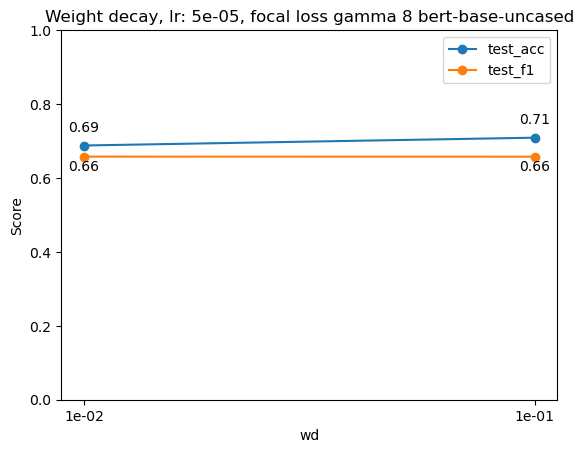

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f